In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
y_pred = np.array([[0.1,0.2]])

In [3]:
epsilon = 1e-15  
y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

In [4]:
y_pred

array([[0.1, 0.2]])

# Разведочный анализ

In [5]:
dfm=pd.read_csv('Mushroom_dataset.csv', delimiter = ",", names=['class-label','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])

In [6]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class-label               8416 non-null   object
 1   cap-shape                 8416 non-null   object
 2   cap-surface               8416 non-null   object
 3   cap-color                 8416 non-null   object
 4   bruises                   8416 non-null   object
 5   odor                      8416 non-null   object
 6   gill-attachment           8416 non-null   object
 7   gill-spacing              8416 non-null   object
 8   gill-size                 8416 non-null   object
 9   gill-color                8416 non-null   object
 10  stalk-shape               8416 non-null   object
 11  stalk-root                8416 non-null   object
 12  stalk-surface-above-ring  8416 non-null   object
 13  stalk-surface-below-ring  8416 non-null   object
 14  stalk-color-above-ring  

In [7]:
dfm = dfm[[i for i in dfm if i not in ['veil-type','veil-color', 'gill-attachment']]]

### Классы распредлены одинаково

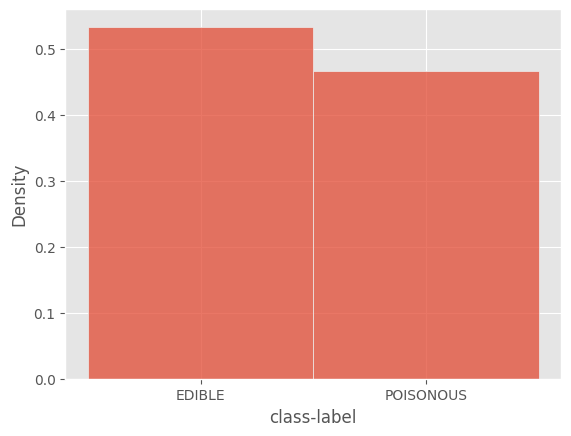

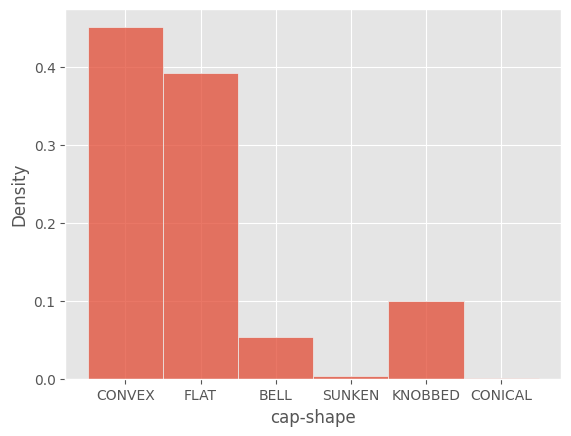

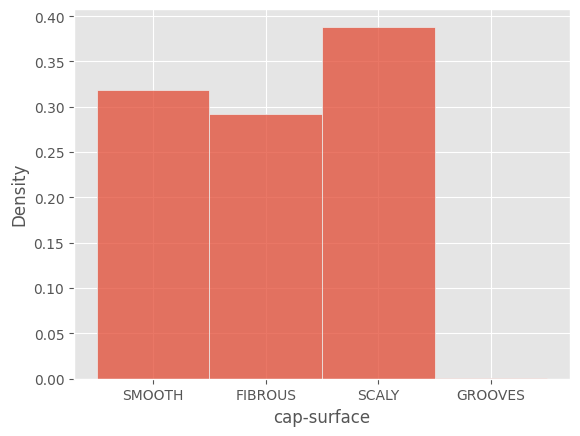

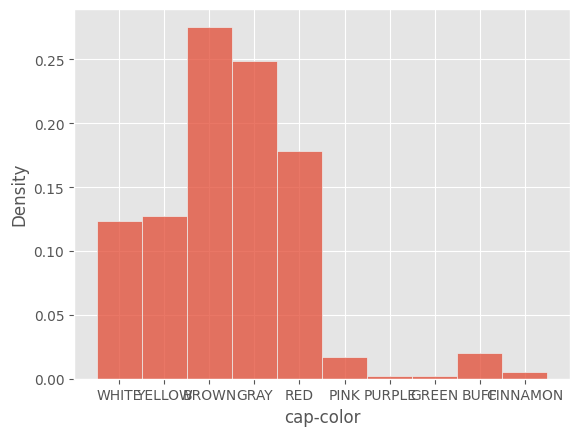

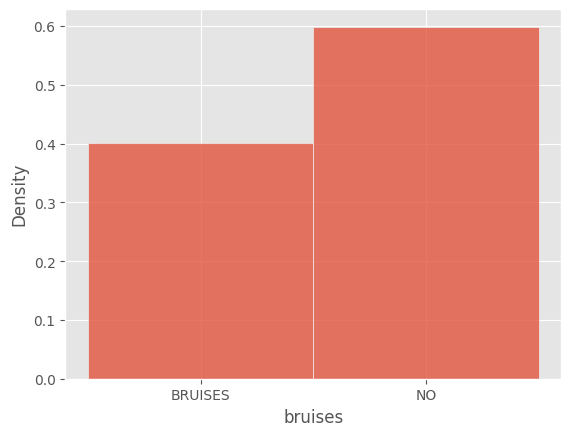

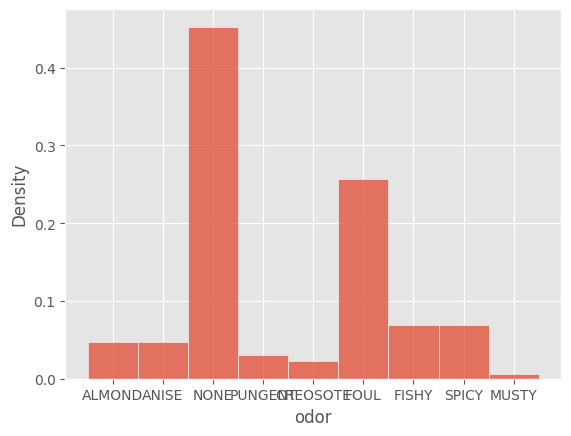

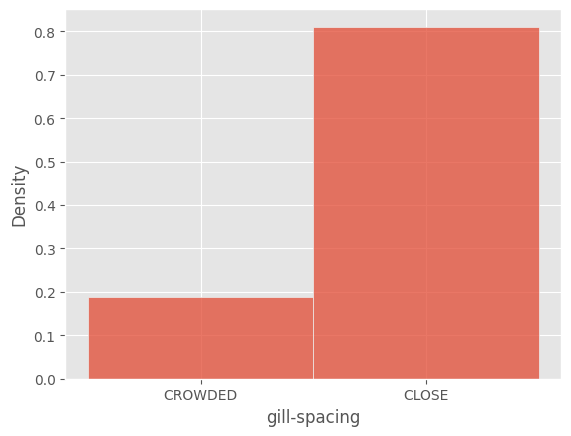

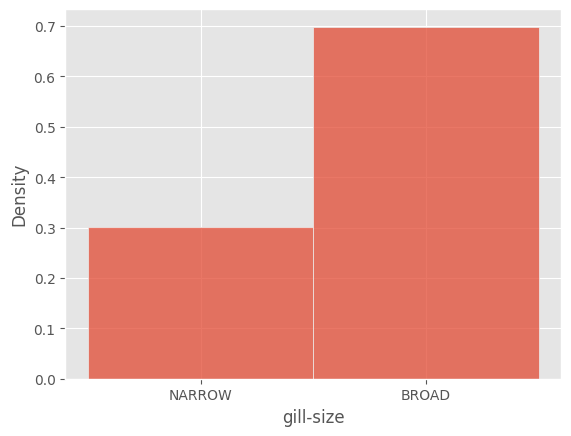

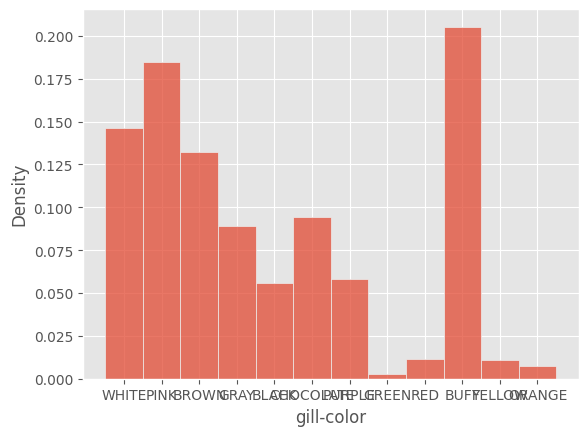

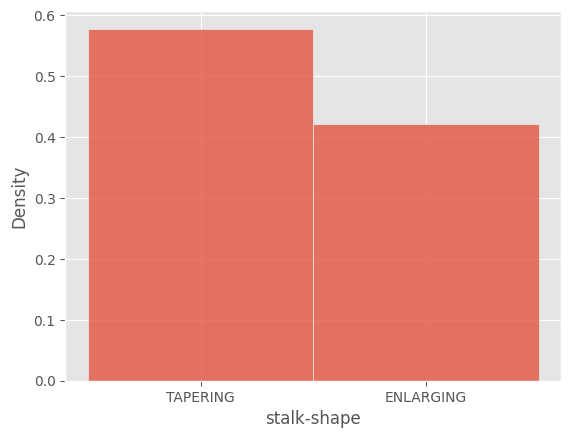

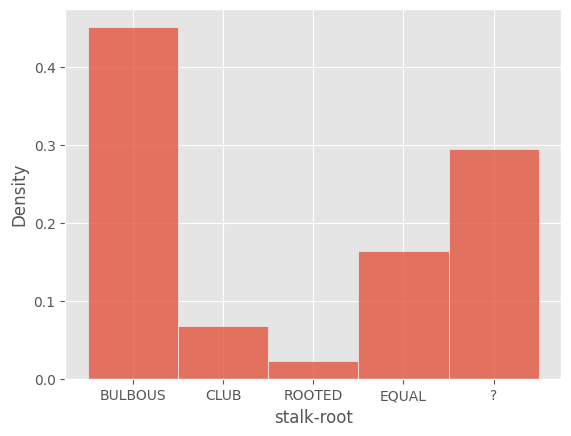

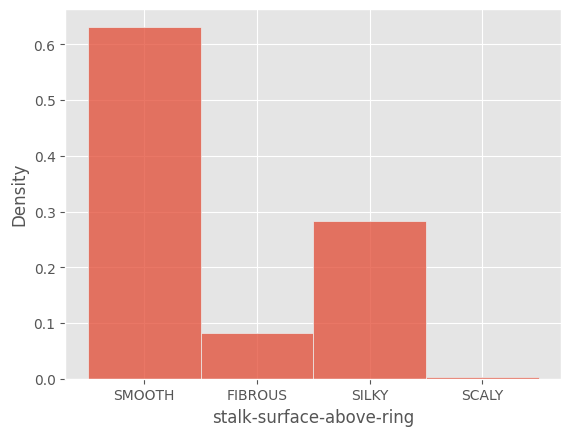

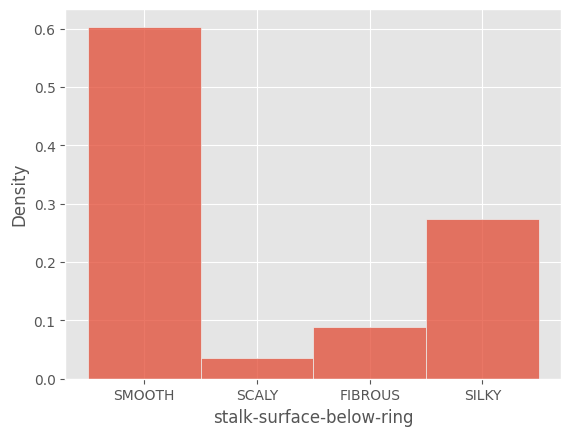

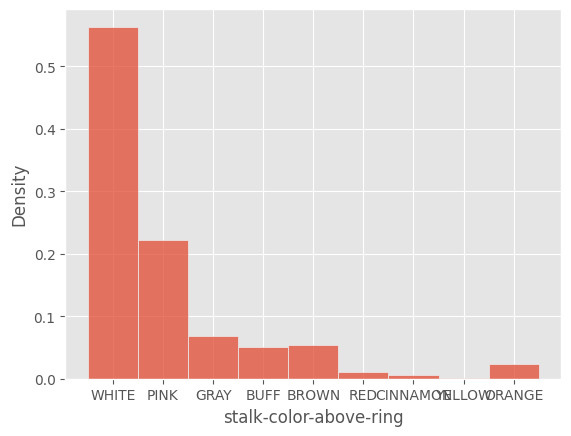

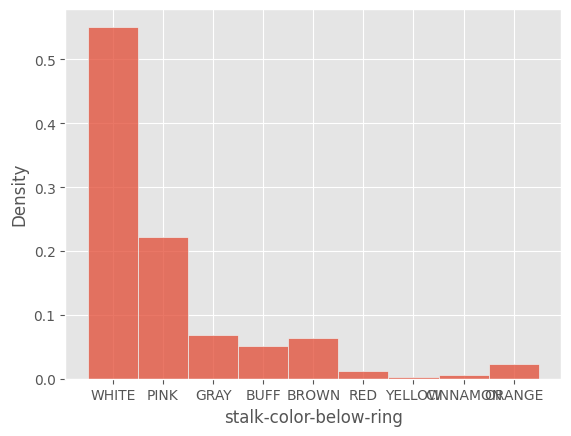

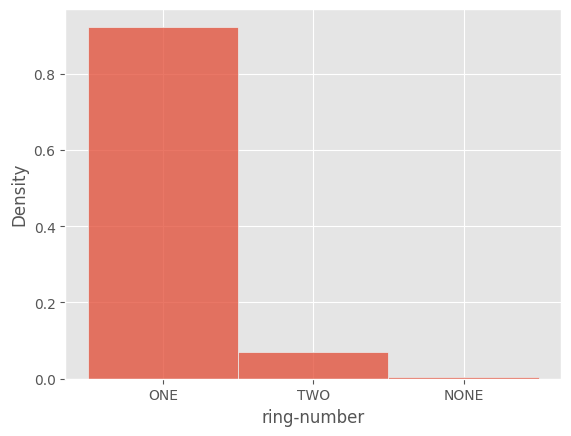

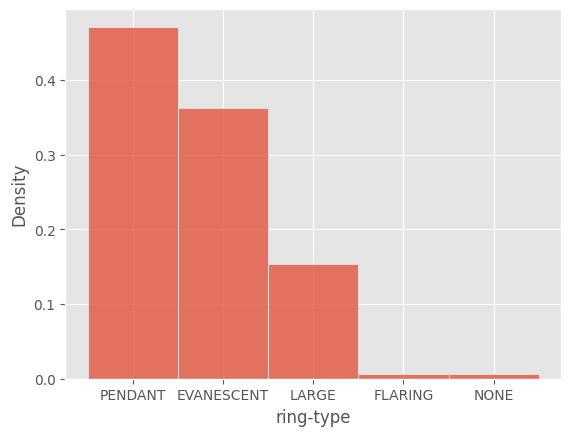

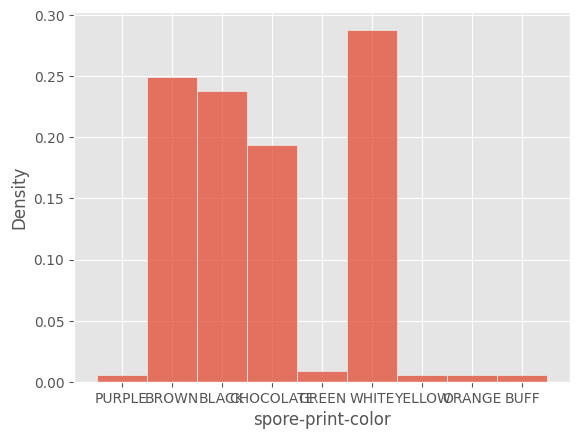

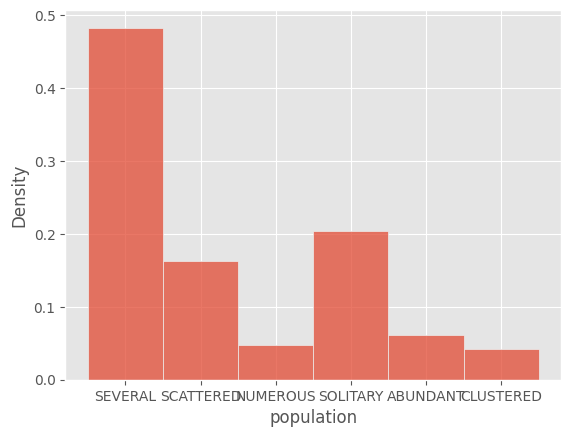

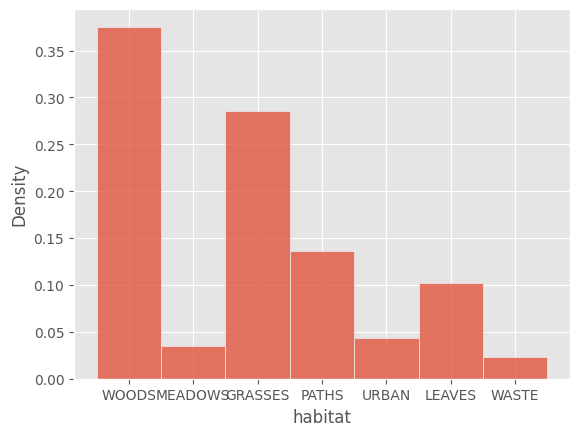

In [8]:
for i in dfm.columns:
    plt.figure(i)
    sns.histplot(dfm[i],stat="density")
    plt.show()

<Axes: >

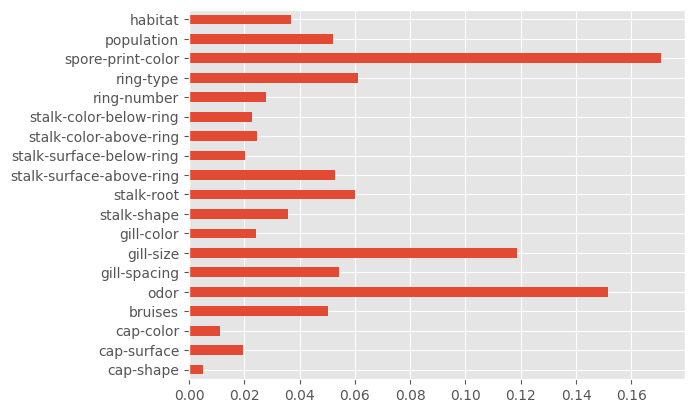

In [9]:
dfm = dfm[[i for i in dfm if i not in ['veil-type','veil-color', 'gill-attachment']]]
le = preprocessing.LabelEncoder()
for column_name in dfm.columns:
    dfm[column_name]=le.fit_transform(dfm[column_name])
Y=dfm.iloc[:, 0:1].values.ravel()
X=dfm.iloc[:, 1:23]
clf = RandomForestClassifier(criterion='entropy', random_state=0)
clf.fit(X, Y)
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

### Что убираем: 
* #### veil_type - один класс везде
* #### veil_color - один класс везде
* #### gill-attachment - один класс везде

________________________________________________________
# Модель

In [10]:
def metrics(y_test, y_pred):
    tp = np.sum((y_pred == 1)&(y_test == 1))
    fp = np.sum((y_pred == 1)&(y_test == 0))
    tn = np.sum((y_pred == 0)&(y_test == 0))
    fn = np.sum((y_pred == 0)&(y_test == 1))
    precision = tp / (tp + fp)
    recall = tp / (tp + fn) 
    accuracy = (tp + tn) / (len(y_pred))
    F1 = 2*precision*recall/(precision+recall)

    '''print('precision: ', precision)
    print('recall: ',recall)
    print('accuracy: ', accuracy)
    print('F1: ', F1)'''
    
    return pd.DataFrame({'Accuracy':[accuracy],
                         'Precision':[precision],
                         'Recall': [recall],
                         'F1': [F1]})


In [11]:
def roc_curve(y_pred, y_true):
    tpr = []
    fpr = []
    for i in range(2):
        y_pred_ = y_pred[:,i]
        y_true_ = y_true[:,i]
        tresholds = sorted(y_pred_, reverse = True)
        tpr_ = []
        fpr_ = []
        positive = sum(y_true_)
        negative = y_true_.shape[0] - positive
        for tr in tresholds:
            y_calc_tr = np.array([1 if j >= tr else 0 for j in y_pred_])
            tp = np.sum((y_true_ == 1) & (y_calc_tr == 1))
            fp = np.sum((y_true_ == 0) & (y_calc_tr == 1))
            tpr_.append(tp/positive)
            fpr_.append(fp/negative)
        tpr.append(tpr_)
        fpr.append(fpr_)
    return tpr, fpr

In [12]:
le = preprocessing.LabelEncoder()
for column_name in dfm.columns:
    if column_name != 'class-label':
        dfm[column_name]=le.fit_transform(dfm[column_name])
    else:
        Y = pd.get_dummies(dfm[column_name],dtype =int)
X=dfm.iloc[:, 1:23]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [20]:
np.array(range(32)).reshape(32,1)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31]])

In [21]:
y_train.to_numpy().shape

(5891, 2)

In [28]:
X_train.to_numpy()

array([[2, 3, 3, ..., 7, 3, 0],
       [4, 3, 7, ..., 7, 4, 3],
       [2, 0, 9, ..., 6, 4, 6],
       ...,
       [3, 2, 9, ..., 3, 4, 3],
       [3, 0, 0, ..., 0, 5, 4],
       [4, 3, 7, ..., 7, 4, 6]], dtype=int64)

In [29]:
X_train.shape

(5891, 19)

In [27]:
X_train.to_numpy()

array([[2, 3, 3, ..., 7, 3, 0],
       [4, 3, 7, ..., 7, 4, 3],
       [2, 0, 9, ..., 6, 4, 6],
       ...,
       [3, 2, 9, ..., 3, 4, 3],
       [3, 0, 0, ..., 0, 5, 4],
       [4, 3, 7, ..., 7, 4, 6]], dtype=int64)

In [14]:
from MLP import MLP
net_arch = (X_train.to_numpy().shape[1], 10, 8, 2)
mlp = MLP(net_arch)
epochs = 28
epoch_losses = mlp.train(X_train, y_train, epochs=epochs,batch_size=2)
plt.plot(epoch_losses)

c:\Users\Aleks\anaconda3\envs\business\lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


ImportError: 
================================================================
Failed to import CuPy.

If you installed CuPy via wheels (cupy-cudaXXX or cupy-rocm-X-X), make sure that the package matches with the version of CUDA or ROCm installed.

On Linux, you may need to set LD_LIBRARY_PATH environment variable depending on how you installed CUDA/ROCm.
On Windows, try setting CUDA_PATH environment variable.

Check the Installation Guide for details:
  https://docs.cupy.dev/en/latest/install.html

CUDA Path: None
DLL dependencies:
  KERNEL32.dll -> C:\WINDOWS\System32\KERNEL32.DLL
  MSVCP140.dll -> c:\Users\Aleks\anaconda3\envs\business\MSVCP140.dll
  VCRUNTIME140.dll -> c:\Users\Aleks\anaconda3\envs\business\VCRUNTIME140.dll
  api-ms-win-crt-convert-l1-1-0.dll -> C:\WINDOWS\System32\ucrtbase.dll
  api-ms-win-crt-environment-l1-1-0.dll -> C:\WINDOWS\System32\ucrtbase.dll
  api-ms-win-crt-filesystem-l1-1-0.dll -> C:\WINDOWS\System32\ucrtbase.dll
  api-ms-win-crt-heap-l1-1-0.dll -> C:\WINDOWS\System32\ucrtbase.dll
  api-ms-win-crt-runtime-l1-1-0.dll -> C:\WINDOWS\System32\ucrtbase.dll
  api-ms-win-crt-stdio-l1-1-0.dll -> C:\WINDOWS\System32\ucrtbase.dll
  cuTENSOR.dll -> not found
  cublas64_12.dll -> not found
  cudart64_12.dll -> not found
  cudnn64_8.dll -> not found
  cufft64_11.dll -> not found
  curand64_10.dll -> not found
  cusolver64_11.dll -> not found
  cusparse64_12.dll -> not found
  nvcuda.dll -> C:\WINDOWS\SYSTEM32\nvcuda.dll
  nvrtc64_120_0.dll -> not found
  python38.dll -> c:\Users\Aleks\anaconda3\envs\business\python38.dll

Original error:
  ImportError: DLL load failed while importing runtime: Не найден указанный модуль.
================================================================


In [15]:
y_pred = mlp.predict(X_test.to_numpy())
y_pred_ = np.argmax(y_pred,axis=1)
y_test_ = np.argmax(y_test, axis=1)
metrics(y_test_, y_pred_)

,Accuracy,Precision,Recall,F1
0,0.997228,0.999142,0.994872,0.997002


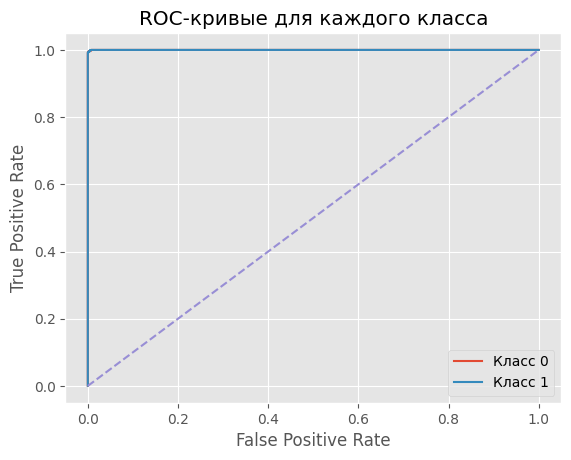

In [17]:
tpr, fpr = roc_curve(y_pred, y_test.to_numpy())
for each_class in range(2):
    plt.plot(fpr[each_class], tpr[each_class], label=f'Класс {each_class}')
plt.plot(np.array([0, 1]), linestyle = 'dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для каждого класса')
plt.legend()

EDIBLE - 0
POISONOUS - 1